# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from __future__ import division
import scipy.stats as stats

import statsmodels.api as sm
sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.isnull().any()

temperature    False
gender         False
heart_rate     False
dtype: bool

## Distribution of Body Temperature


Wunderlich's mean body temperature, 98.6 F is set as the population mean under the null hypothesis that the true population mean body temperature. The Altnerative hypothesis is that the mean body temperature is not 98.6. This should yield a two-tail probability distribution. The true mean body temperature is actually 98.2, but let's see if the data will show just that. 

$H_{o}$ : $\mu$ = 98.6

$H_{A}$ : $\mu$ $\ne$ 98.6


A Normal test was also used to check for normality. The function tests whether the sample data comes from a normal distribution under the null hypothesis, since the p-value is 0.258 is greater than 0.05, the null hypothesis is not rejected. 

To check the normality of the data the following EDA graphs were used: histogram, CDF, QQplot and a box plot.
The Histogram does not show an entirely symmetric bell-shaped curve that a Normal Distribution would have. Its tails are thicker and the right-tail is slightly skewed in its shape with some variation. Both the QQplot and CDF/ECDF plots do not show an entirely accurate fit and may be reflected in the off-shape of the right-tail in the histogram. Last and finally, the box plot's Q1/Q3 and whiskers are not symmetric in range with a few outliers. All the graphs indicate that the distribution of the data is can be approximation of the Normal Distribution. Thus, since the following conditions are met under the Central Limit Theorem, the Normal Distribution can be used to approximate the sampling distribution. 

The Central Limit Theorem:
1. The sample is collected randomly from the population and each observation is independent from one another. 
2. Large Sample of n=130
3. The population is large (there are more than 1300 people in the population at the time the data was collected)


In [5]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

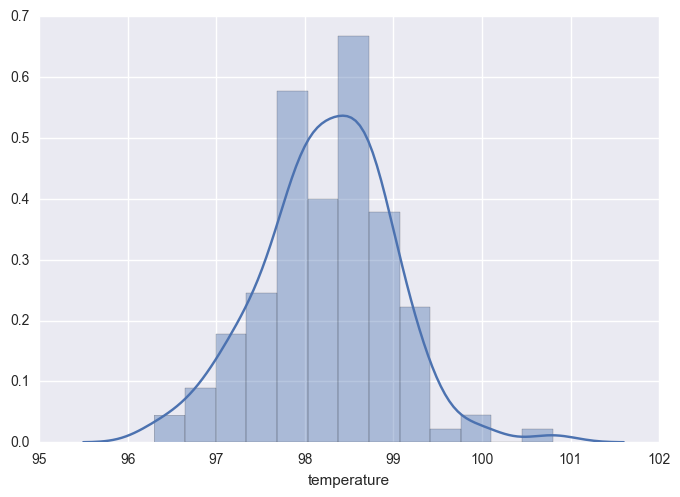

In [6]:
sns.distplot(df.temperature, norm_hist=True)

In [7]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/ n
    return x,y

In [8]:
mean = np.mean(df.temperature)
std = np.std(df.temperature)

samples = np.random.normal(mean, std, 130)

x,y = ecdf(df.temperature)
x_t, y_t = ecdf(samples)

In [9]:
prob = np.sum(samples != 98.6) / len(samples)
prob

1.0

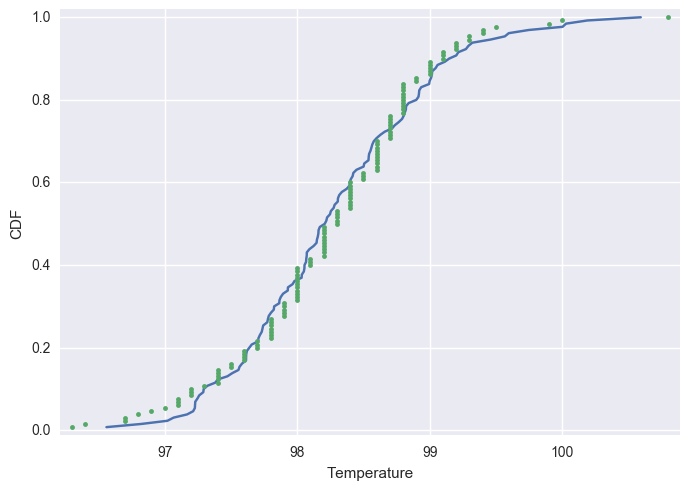

In [10]:
plt.plot(x_t,y_t)
plt.plot(x,y, linestyle='none',marker='.')

plt.xlabel('Temperature')
plt.ylabel('CDF')
plt.margins(0.02)
plt.show()

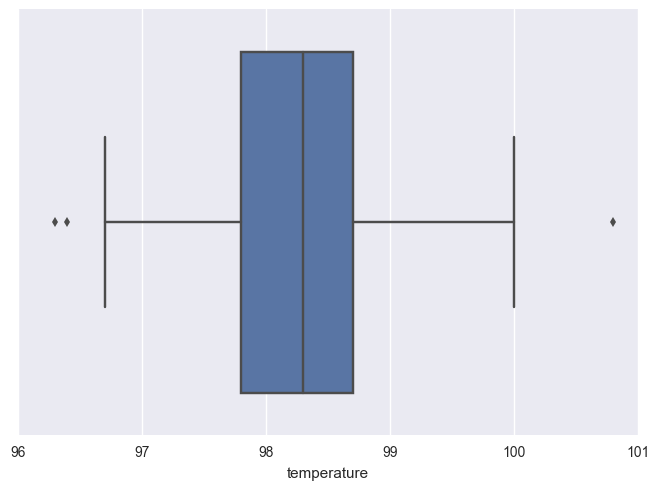

In [11]:
sns.boxplot(x='temperature', data=df)

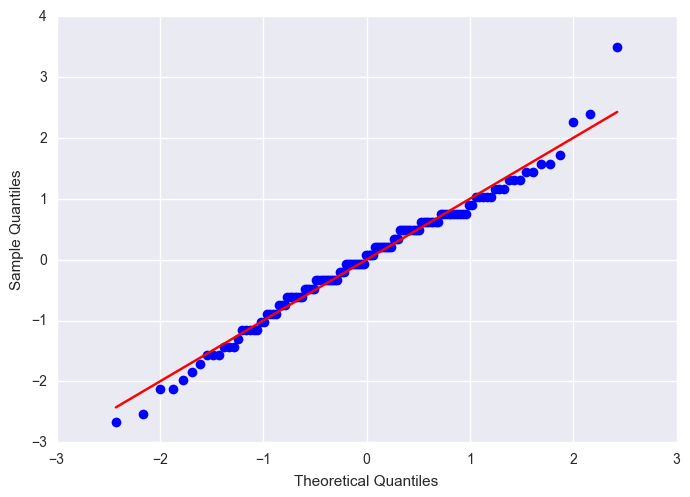

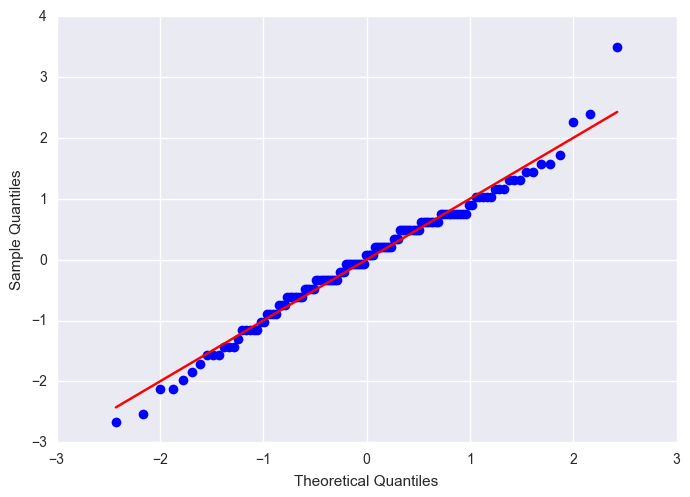

In [12]:
sm.qqplot(df.temperature, fit=True, line='s')

## Using the Shapiro-Wilk Test to check for normality

If the data, under the Null Hypothesis, the population follows a normal distribution. 

W = 0.98

p-value= 0.233

Because the p-value value under the SW-Test is greater than 0.05, the null hypothesis is not rejected and there is reason to believe that the data does follow a Normal Distribution 

In [13]:
SW_test = stats.shapiro(df.temperature)
W, p_value = SW_test
W, p_value

(0.9865770936012268, 0.233174666762352)

## One-Sample T-Test



All of the EDA graphs show that the data does not follow a Normal Distribution entirely and thus a T-Test is used to approximate the distribution of the population mean body temperature as a T-Distribution. The T-test is also a good estimator of the population mean when $\sigma$ of the population is unknown. It is worth noting that as the degrees of freedom increases (or approaches infinity), the T-distribution approaches a Normal Distribution. 


If these conditions are met then the t-statistic will follow a t-distribution. 
1. The observations are indepedent and the sample is randomly drawn
2. Large sample and that the population is distributed normally (which was checked under the SK-Test that the population is distributd normally)
3. Big population


### t = $\frac{\bar{x} - \mu_{o}}{\delta /\sqrt{n} }$

t = -5.454

p-value =  2.4106e-07


The t-statistic is -5.454 units away from 0 and with the p-value being less than 0.05, the null hypothesis is then rejected. And there is reason to believe that the true mean body temperature is not 98.6. 

In [14]:
#sample size
n= len(df.temperature)
n 

130

In [15]:
#sample mean and sample standard deviation
mean = np.mean(df.temperature)
std = np.std(df.temperature)
mean, std

(98.24923076923078, 0.7303577789050377)

In [16]:
t_stat = stats.ttest_1samp(df.temperature,98.6)
t, p = t_stat
t, p

(-5.4548232923645195, 2.4106320415561276e-07)

### As the DoF increases, the T-Distribution approaches the Normal Distribution

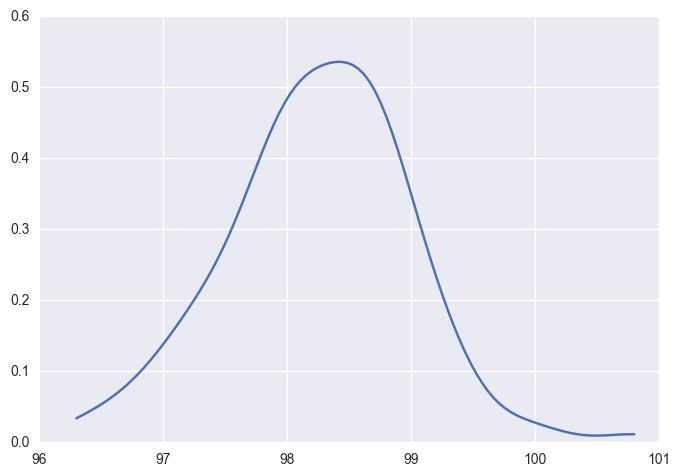

In [17]:
#tcrit = abs(st.t.ppf(alpha/ntails, dof))

alpha = 0.05
ntails= 2
dof=129
tcrit= abs(stats.t.ppf(alpha/ntails, dof))



from scipy.stats.kde import gaussian_kde
from numpy import linspace
# this create the kernel, given an array it will estimate the probability over that values
kde = gaussian_kde(x)
# these are the values over wich your kernel will be evaluated
dist_space = linspace( min(x), max(x), 100 )
# plot the results
plt.plot(dist_space, kde(dist_space) )




## Abnormal Temperatures

The mean body temperature calculated from the sample is 98.249Any . At a 95% Confidence Interval, the mean body temperature can range as low as 98.122 and as high as 98.375. This shows that the population mean of 98.6 is not accurate. 

However, if you were to just take the normal 95% percentile of the sample, a temperature lower than 96.7225 and a temperature higher than 99.4775 is considered abnormal. 

In [18]:
tcrit= abs(stats.t.ppf(alpha/ntails, dof))
tcrit

1.9785244914586055

In [19]:
ME = std/ np.sqrt(n)

#95% Confidnce
low_tail = mean - tcrit*ME
high_tail = mean + tcrit*ME
low_tail, high_tail

(98.12249318821641, 98.375968350245145)

In [20]:
np.percentile(df.temperature,[2.5,97.5])

array([ 96.7225,  99.4775])

### Bootstrap Hypothesis 1 Sample Test

The mean is used as the test statistic. Under the Bootstrap Hypothesis test, the mean body temperature under the null hypothesis is assumed to be true such that simulations will be preformed where the sample mean will be shifted in order to equal the population mean.
Because the p-value is extremely small, where it's less than 0.05, the null hypothesis is rejected. The sample mean measured from the data is not consistent with the population mean of 98.6. There is reason to believe that the sample mean and the population are not equal. 


At 95% CI, any temperatures less than 98.475 and temperatures over 98.730 is considered abnormal. However, this confidence interval does not even include the sample mean body temperature of 98.249.

In [21]:
bs_sample = np.random.choice(df.temperature, n)
bs_reps = np.mean(bs_sample)
CI = np.percentile(bs_reps, [2.5, 97.5])
CI

array([ 98.18461538,  98.18461538])

In [22]:
def bsrep_1d (data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bsreps (data, func, size=1):
    bs_reps = np.empty(size)
    for i in range(size):
        bs_reps[i] = bsrep_1d(data, func)
    return bs_reps

In [23]:
#shifting the sample mean so that it equals the population mean
popmean= 98.6
shifted_data = df.temperature - mean + popmean


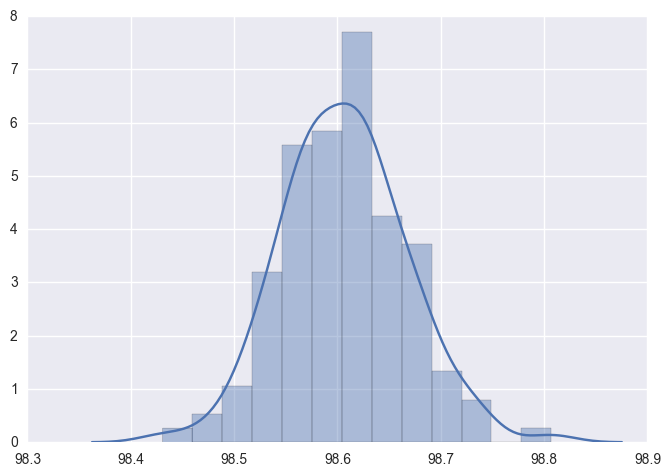

In [24]:
bs_reps = draw_bsreps (shifted_data, np.mean, n)
sns.distplot(bs_reps)

In [25]:
np.percentile(bs_reps, [2.5, 97.5])

array([ 98.50282692,  98.73028846])

In [26]:
p_value = (np.sum(bs_reps <= mean) + np.sum(bs_reps >= 98.951)) / len(bs_reps)
p_value


0.0

## Z-test

In the T-test, the degrees of freedom is 129, which is fairly a large number. Because of the size of the DoF, the T-distribution approaches a Normal Distribution and so the Z-test can be used to approximate the sampling distribution. $\sigma$ is unknown for the population, but because we are approximating the sampling distribution, $\frac{\delta}{\sqrt{n}}$ can be used instead. 


z = $\frac{\bar{x} - \mu_{o}}{\sigma }$

z = $\frac{\bar{x} - \mu_{o}}{\delta /\sqrt{n} }$


p-value = 4.3523151658821886e-08

We get a p-value less than 0.05 and we then reject the null hypothesis. Even under the approximation of the sampling distribution with the Normal Distribution, it shows that the true mean body temperature is not 98.6.  The sample mean is 98.249 and at a 95% CI the sample mean value can be between 98.123 and 98.374. 

In [27]:
sigma = std/np.sqrt(130)
z = (mean - 98.6) /sigma
z

-5.4759252020781162

In [28]:
#two-sided
p_z= stats.norm.sf(abs(z))*2
p_z

4.3523151658821886e-08

In [29]:
mean - 1.96*sigma, mean+1.96*sigma

(98.123679804428193, 98.374781734033363)

## Is there a significant difference between the mean body temperature of Women and Men?


A Two-Sample Welch's T-Test and 1 Sample ANOVA test was used to determine if there is a significant difference between the mean body temperature between women and men.



$\bar{x}_{1}$ = Average Male Body Temperature

$\bar{x}_{2}$ = Average Female Body Temperature

$H_{o}$ : $\bar{x}_{1}$ - $\bar{x}_{2}$  = 0 or $\bar{x}_{1}$ = $\bar{x}_{2}$

$H_{A}$ : $\bar{x}_{1}$ - $\bar{x}_{2}$ $\ne$ 0 or $\bar{x}_{1}$ $\ne$ $\bar{x}_{2}$

Welch's T-Test was used instead of a standard Two Sample T-Test because the standard variation between men and women ware different. Because the p-value is less than 0.05, twe reject the null hypothesis such that there is no significant difference between the mean body temperatures between women and men. 

The average female body temperature is 98.393846 and at a 95% CI can be between 98.214 and 98.573. The male average body temperature is 98.104615 at a 95% CI can be between 97.936 and 98.273. With the data showing that that there is -0.2892 difference in means with a [-0.5420, -0.0364] 95% CI between men and women.  

Overall, the data shows that there is a -0.2892 significant difference betwen male and female average body temperatures. The confidence interval for the t-statistic indicates that $\bar{x}_{2}$ > $\bar{x}_{1}$ where female body temperatures can be as low as a -0.5420 and as high as -0.0364 than male body temperatures. 



t-statistic = -2.2854

p-value = 0.0239

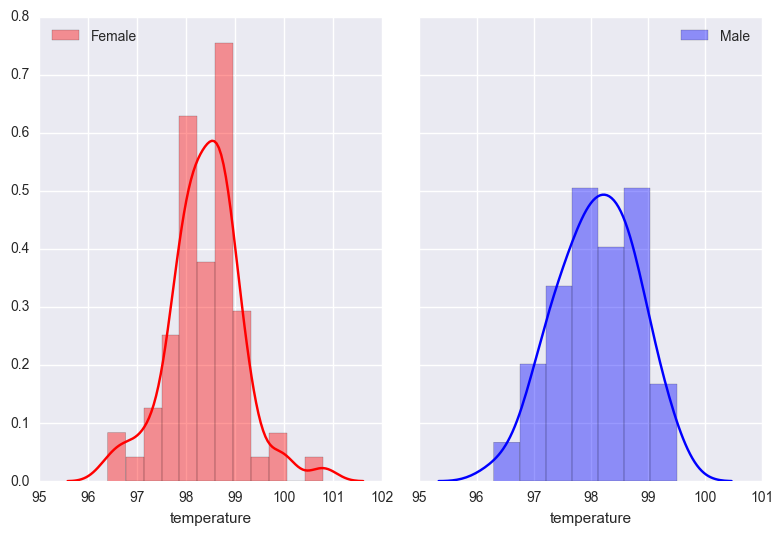

In [44]:
f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
sns.distplot(female_data, norm_hist=True, label='Female', color='red',ax=ax1)
ax1.legend(loc='upper left')


sns.distplot(male_data, norm_hist=True, label='Male', color='blue', ax=ax2)

ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [49]:
gender = df.groupby('gender')['temperature'].mean()
female_mean, male_mean = gender
gender

gender
F    98.393846
M    98.104615
Name: temperature, dtype: float64

In [50]:
df.groupby('gender').size()

gender
F    65
M    65
dtype: int64

In [51]:
gender_std = df.groupby('gender')['temperature'].std()
F_std, M_std = gender_std
F_std, M_std

(0.74348775273136747, 0.69875576232659764)

In [52]:
female_data = df[df.gender=='F']
female_data = female_data.temperature

male_data = df[df.gender=='M']
male_data = male_data.temperature

In [53]:
data_concat = np.concatenate((male_data, female_data))

mean_data = np.mean(data_concat)
mean_data

98.249230769230763

In [54]:
shifted_female = female_data - np.mean(female_data) + mean_data
shifted_male = male_data - np.mean(male_data) + mean_data

In [55]:
bs_reps_female = draw_bsreps(shifted_female, np.mean, len(shifted_female))
bs_reps_male = draw_bsreps(shifted_male, np.mean, len(shifted_male))

In [56]:
bs_gender_reps = bs_reps_male - bs_reps_female
emp_diff_means = male_mean - female_mean
p_gender = (np.sum(bs_gender_reps>= emp_diff_means) & np.sum(bs_gender_reps<= emp_diff_means)) /len(bs_gender_reps)
p_gender

0.0

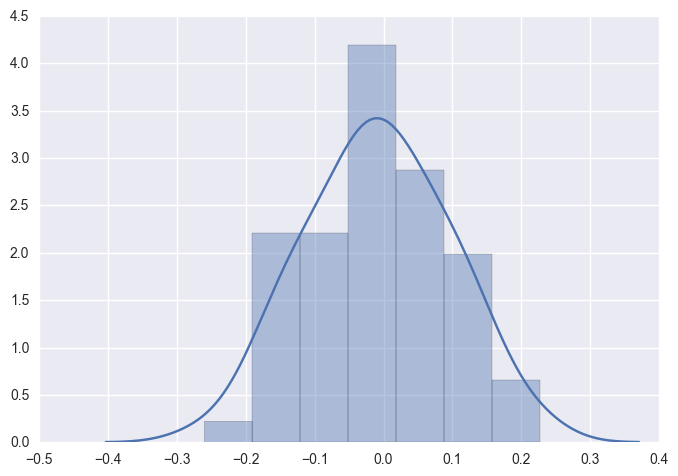

In [37]:
sns.distplot(bs_gender_reps, norm_hist=True)

In [38]:
two_samT = stats.ttest_ind(male_data, female_data, equal_var=False)
t, p = two_samT
t,p

(-2.2854345381656112, 0.023938264182934196)

In [39]:
one_ANOVA = stats.f_oneway(male_data, female_data)
F, p = one_ANOVA
F, p

(5.2232110282402724, 0.023931883122395092)

In [57]:
#Standard Error estimator
SE_2 = np.sqrt(((F_std**2)/ len(female_data)) + ((M_std**2)/len(male_data)))

#critical t value 
tcrit_2= abs(stats.t.ppf(alpha/ntails, 64))
tcrit_2

low_diff = emp_diff_means - tcrit_2 * SE_2
high_diff = emp_diff_means + tcrit_2 * SE_2

low_diff, high_diff



(-0.54205134876792682, -0.036410189693527106)

In [41]:
def confint(data):
    SEM = np.std(data) / np.sqrt(len(data))
    m = 1.96 * SEM
    return np.mean(data) - m, np.mean(data) + m

In [42]:
female_ci = confint(female_data)

"Female CI at 95%: {}".format(female_ci)


'Female CI at 95%: (98.21449403134109, 98.573198276351164)'

In [43]:
male_ci = confint(male_data)
"Male CI at 95%: {}".format(male_ci)



'Male CI at 95%: (97.936053994564929, 98.27317677466587)'

## Conclusion

Wunderlich's average body temperature is not 98.6 and the average body temperature is more close to 98.249, with temperature values as low as 98.122 and high as 98.375 is within 95% certainty. When looking at the distributions between the female and male body temperatures, the female distribution is less symmetric whereas the male body temperature is more of a Normal Distribution. In contrast to the population mean 98.6, this difference between the gender body temperature may contribute to its lack of symmetry such that the female body temperature is higher than males. 


